### Task 1

**There is a KNN classifier (K-means) presented in the slides. Explain verbally how the
code must be changed to classify time series. How the time series should be presented to
it? What precautions must be done?**

The knn_test.py and methods presented in the slides are showing data on x,y coordinates. Thus, data in time series needs to be formatted into the same shape in order to analyze with KNN classifier. For example, Amazon stock data can be classified with this method by feature extraction. We can extract features such as moving averages, volatility for stock data. Other choices could be mean, variance, etc. 

Changes to knn_test.py should be in lines 35-40, where the data points for x,y,z are initialized. Replace them with features extracted from the time series. However, as a precaution, shape of the data vectors should be the same to obtain accuracy and reliable results. This can be done by padding missing data points or removing data to match the lowest sized datavector. Normalization should be uncommented, since measured features can vary in scale.

### Task 2

**Download and modify ‘SVM_example.py’ from file folder to show the actual recognition
accuracy to all (four) included models. Use loop -like structure for different models. You
can copy/mimic the recognition accuracy idea from ‘Exercise_train_test.py’ from
practical time series classification example. Show the results in your analysis and include
the zipped code.**

Modified SVM_exmaple.py is below. Dataset X and target y are split into training and validation sets. This way the model accuracy is computed for data it is not trained with. Dataset is split with sklearn library train_test_split as following

```from sklearn.model_selection import train_test_split```

```X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)```


Each model is then trained with X_train and y_train sets. Accuracy is calculated with 

```score = clf.score(X_test, y_test)```

and results are inserted into plot. Results show best score for the model "SVC with linear kernel" with 0.80. However, linear kernel has almost identical accuracy with RBF and polynomial kernel (0.78). Thus, the worst model is LinearSVC with score 0.69.

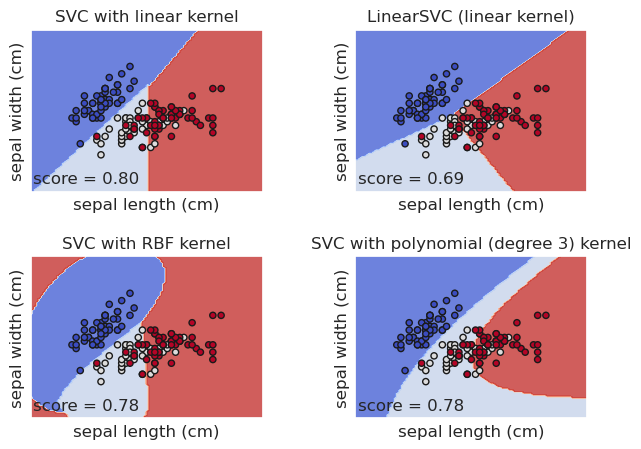

### Exercise 3

***Download and modify ‘SVM_example.py’ to contain 3 x 3 confusion matrix mechanism
described in https://onestopdataanalysis.com/confusion-matrix-python/. Show the result
image in your analysis and include the zipped code.***

3 x 3 confusion matrix is implemented same way as the link, using seaborn heatmap and sklearn confusion_matrix method added to compute confusion matrix.

```
fig, sub = plt.subplots(2, 2, figsize=(12, 10))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

for clf, title, ax in zip(models, titles, sub.flatten()):
    y_pred = clf.predict(X_test)  # Predict on the test set

    # Compute confusion matrix and accuracy
    cm = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)

    # Plot confusion matrix
    seaborn.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", xticklabels=iris.target_names, yticklabels=iris.target_names, ax=ax)
    ax.set_title(f"{title}\nAccuracy: {accuracy:.2f}")
    ax.set_xlabel("Predicted Label")
    ax.set_ylabel("True Label")
    
plt.tight_layout()
plt.show()
```

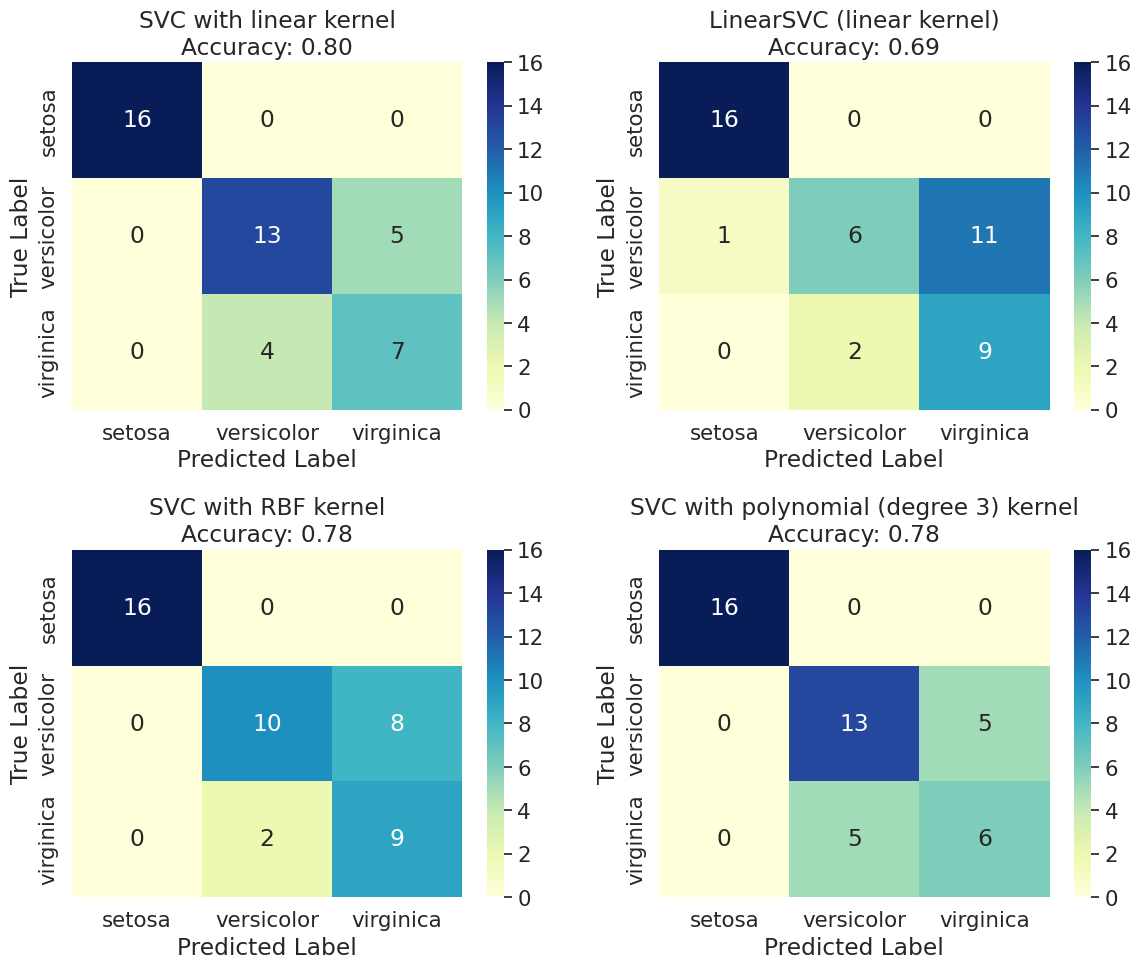

Analysis for SVC with polynomial degree:

Confusion matrix shows that setosa is predicted correctly. Versicolor is predicted correctly 13 times and 5 times incorrect. Virginica has poorest performance with 6 correct and 5 incorrect predictions.

### Exercise 4


**Improve the recognition result of SVM_example.py after the Exercise 1 and/or 2. There
are four different models in the code, choose one and show the results (in numbers or
confusion matrix) in your analysis and include the zipped code.**

RBF kernel takes in parameter gamma, which is float and adjusts how closely model fits training data. Other parameter is C, which is regularization parameter. By trying different values for gamma and C, we may find better results for the model.

Import libraries and load dataset

In [91]:
import matplotlib.pyplot as plt
import seaborn
from sklearn import datasets, svm
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Use GridSeach to find best parameters for the SVC. GridSeachs runs each combination of predefined parameters and finds best model automatically.

In [92]:
C = [0.1, 1, 10, 100]
gammas = [0.1, 1, 10, 100]
kernels = ['rbf']

model = svm.SVC()
gridSearch = GridSearchCV(estimator=model,param_grid={'kernel':kernels,'C':C,'gamma':gammas})
gridSearch.fit(X_train,y_train)
print(f'The best parameter is {gridSearch.best_params_}')
print(f'The best score is {gridSearch.best_score_}')
print(f'The best estimator is {gridSearch.best_estimator_}')

The best parameter is {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
The best score is 0.8285714285714286
The best estimator is SVC(C=1, gamma=0.1)


Visualize results

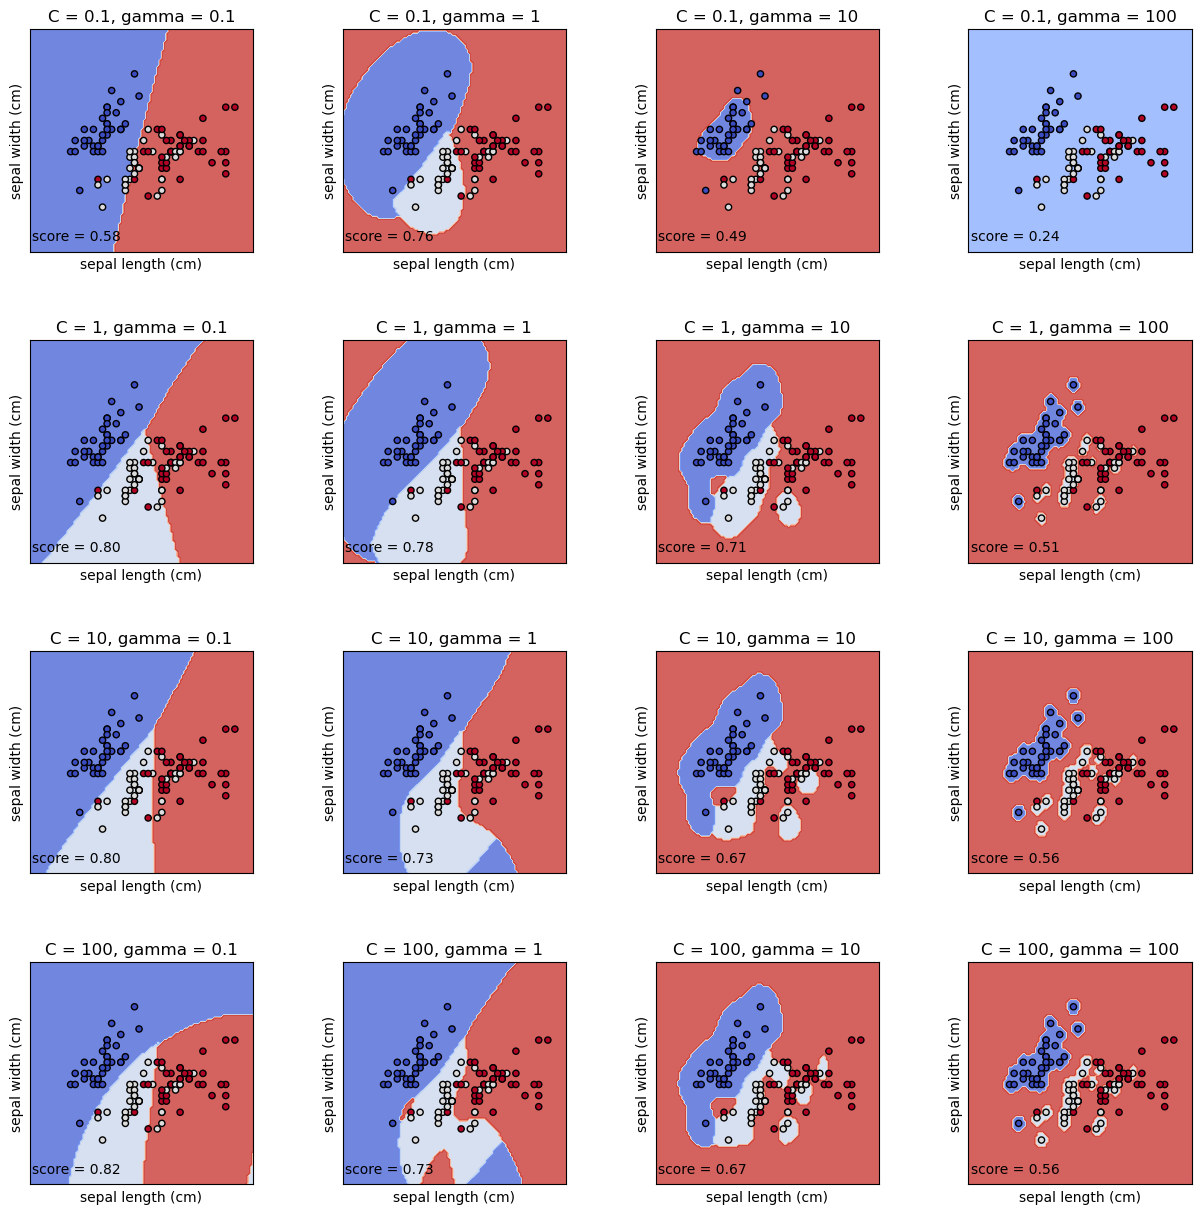

In [93]:
fig, sub = plt.subplots(4, 4, figsize=(15, 15))
plt.subplots_adjust(wspace=0.4, hspace=0.4)
X0, X1 = X_train[:, 0], X_train[:, 1]
for i, c in enumerate(C):
    for j, gamma in enumerate(gammas):
        ax = sub[i, j]
        svc = svm.SVC(kernel="rbf", gamma=gamma, C=c).fit(X_train, y_train)
        # calculate accuracy
        y_pred = svc.predict(X_test)
        score = accuracy_score(y_test, y_pred)
        disp = DecisionBoundaryDisplay.from_estimator(
            svc,
            X_test,
            response_method="predict",
            cmap=plt.cm.coolwarm,
            alpha=0.8,
            ax=ax,
            xlabel=iris.feature_names[0],
            ylabel=iris.feature_names[1],
        )
        ax.scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
        ax.set_xticks(())
        ax.set_yticks(())
        ax.text(0.01, 0.05, f"score = {score:.2f}", transform=ax.transAxes)
        ax.set_title(f"C = {c}, gamma = {gamma}")
plt.show()

Visualized results show best accuracy for C=100 and gamma=0.1. This is slightly different from the GridSeach results which is C=1 and gamma=0.1. However, GridSeach accuracy results are for the training set.

Thus, use C=100 and gamma=0.1 for the Confusion matrix

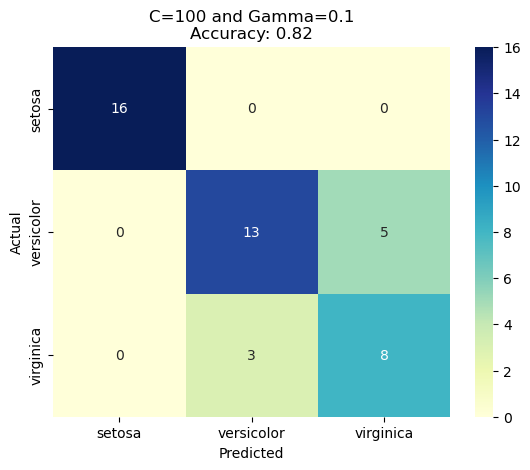

In [94]:
y_pred = svm.SVC(kernel="rbf", gamma=0.1, C=100).fit(X_train, y_train).predict(X_test)
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Plot confusion matrix
seaborn.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"C=100 and Gamma=0.1\nAccuracy: {accuracy:.2f}")
plt.show()

Confusion matrix shows better results for versicolor predictions. Now there are 13 correct predictions vs 10 correct in the previous task. Virginica correct predictions decreased by one.

### Exercise 5

**Modify the ‘Decision_tree_example.py” to train the model with iris data properly and not with the cross validation. Verify the result with real classification accuracy, like in
exercise 1. For improving the performance, take notes from: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html**

Decision_tree_example.py is modified in the same way as task 2. Training data is divided into train and test sets and accuracy score is calculated for the test set.

DecisionTreeClassifier has accuracy score of 0.98, which is significantly better than previously tested SVM.

**Verbally: What the ‘cross validation’ means?**

Cross validation is method to divide dataset into multiple subsets. By iteratively training and testing the model with differently combined subsets, it prevents model from overfitting and improves accuracy.

### EXTRA: Exercise 6.


Import libraries

In [95]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from aeon.datasets import load_classification

Download "GunPoint" time series classification database and split into train and test sets (150 and 50)

Description of GunPoint dataset:

This dataset involves one female actor and one male actor making a motion with their hand. The two classes are: Gun-Draw and Point: For Gun-Draw the actors have their hands by their sides. They draw a replicate gun from a hip-mounted holster, point it at a target for approximately one second, then return the gun to the holster, and their hands to their sides. For Point the actors have their gun by their sides. They point with their index fingers to a target for approximately one second, and then return their hands to their sides. For both classes, we tracked the centroid of the actor's right hands in both X- and Y-axes, which appear to be highly correlated. The data in the archive is just the X-axis. **Class 1 is "gun" and class 2 is "no gun (pointing)**"

In [96]:
X, y, meta_data = load_classification("GunPoint", return_metadata=True)
# Convert X to 2D
X = X.reshape(X.shape[0], -1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

print(" Shape of X_train = ", X_train.shape)
print(" Shape of X_test = ", X_test.shape)
print(" Meta data = ", meta_data)

 Shape of X_train =  (150, 150)
 Shape of X_test =  (50, 150)
 Meta data =  {'problemname': 'gunpoint', 'timestamps': False, 'missing': False, 'univariate': True, 'equallength': True, 'classlabel': True, 'targetlabel': False, 'class_values': ['1', '2']}


Train RandomForestClassifier using train set

In [102]:
clf = RandomForestClassifier(n_estimators=1000, max_depth=2, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, n_estimators=1000, random_state=0)

Compute accuracy results and visualize results with confusion matrix using same methods as in previous tasks.

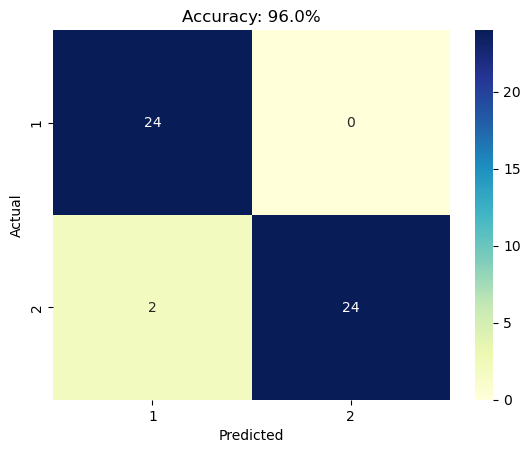

In [103]:
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Plot confusion matrix
seaborn.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", xticklabels=meta_data["class_values"], yticklabels=meta_data["class_values"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Accuracy: {accuracy*100:.1f}%")
plt.show()

RandomForestClassifier has 96 % accuracy to predict whether the actor has "gun" (class 1) or "no gun pointing" (class 2). Confusion matrix shows that class 1 is predicted correctly 24 times with zero miss classifications. Class 2 is predicted correctly 24 times and 2 times misclassified as class 1. Random forest classifier seems to work really good on the dataset and accuracy score is almost 100%. 

There was no need for modifications to improve results. The n_estimators parameter was switched from 100 -> 1000, which resulted in same accuracy score but it is now able to predict class 1 without mistakes and increased missprediction on class 2 by one.

To further analysis Random forest classifier, swap training and test sets. Now the model is trained with size of 50 and tested with 150.

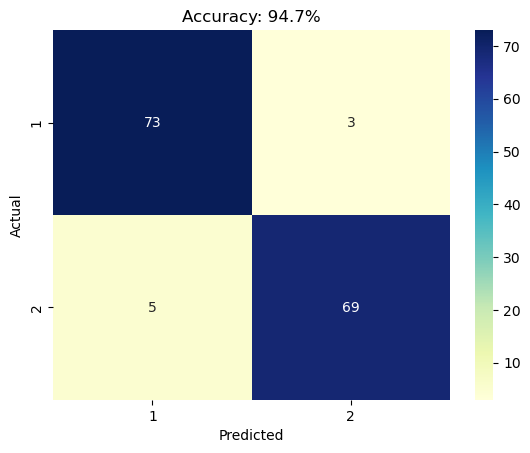

In [99]:
clf = RandomForestClassifier(n_estimators=1000, max_depth=2, random_state=0)
clf.fit(X_test, y_test)

y_pred = clf.predict(X_train)
cm = confusion_matrix(y_train, y_pred)
accuracy = accuracy_score(y_train, y_pred)

# Plot confusion matrix
seaborn.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", xticklabels=meta_data["class_values"], yticklabels=meta_data["class_values"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Accuracy: {accuracy*100:.1f}%")
plt.show()

Results remain good, slightly lower accuracy of 94.7 %. Confusion matrix shows a bit more missclassifications to both class 1 and class 2. Random forest classifier seems to work well with smaller training sets.